In [1]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

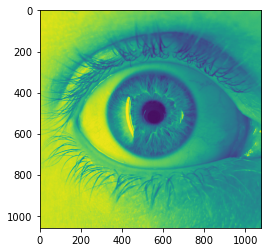

In [2]:
#Path to image
path = 'D:\MACHINE VISION\QUIZ 3\eye_pupil.jpg'

#read the image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)

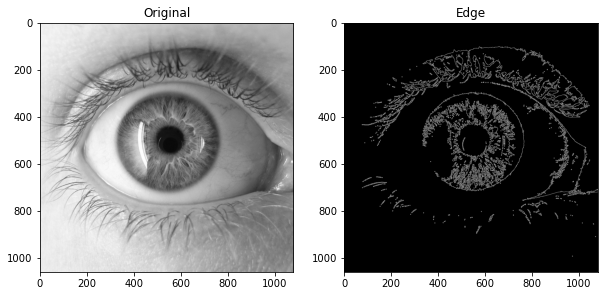

In [3]:
# binarize the image
_, gray = cv2.threshold(img, 100,255,cv2.THRESH_BINARY_INV)

# remove noise
#img_eye = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
#sobelx = cv2.Sobel(img_eye,cv2.CV_64F,1,0,ksize=5)  # x
#sobely = cv2.Sobel(img_eye,cv2.CV_64F,0,1,ksize=5)  # y

#plt.subplot(2,2,1),plt.imshow(img_eye,cmap = 'gray')
#plt.title('Original'), plt.xticks([]), plt.yticks([])
#plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
#plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
#plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
#plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

#plt.show()
  
# Defining all the parameters
t_lower = 100 # Lower Threshold
t_upper = 200 # Upper threshold
aperture_size = 5 # Aperture size
L2Gradient = True # Boolean
  
# Applying the Canny Edge filter 
# with Aperture Size and L2Gradient
edge = cv2.Canny(gray, t_lower, t_upper,
                 apertureSize = aperture_size, 
                 L2gradient = L2Gradient ) 
  
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(img,cmap='gray');plt.title('Original');
plt.subplot(122);plt.imshow(edge,cmap='gray');plt.title('Edge');

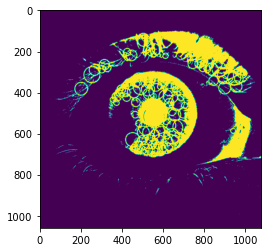

In [4]:
img = gray.copy()

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.3, 20,
                                   param1 = 50, param2 = 30, minRadius = 1, maxRadius = 40)
    
    
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (255, 0, 255), 3)
    
plt.imshow(img)

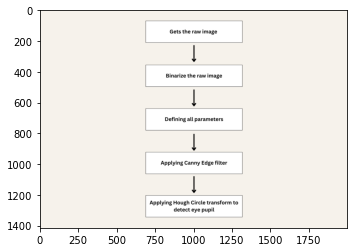

In [5]:
flowchart = plt.imread('D:\MACHINE VISION\QUIZ 3\Flowchart.png')
plt.imshow(flowchart)

Question 3

In [6]:
#Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
import os

my_w = tk.Tk()
my_w.geometry("1280x720")  # Size of the window 

my_w.title('Hough Circle Transformation')
my_font1=('times', 18, 'bold')

#Label 1 (Upload Image)
l1 = tk.Label(my_w,text='Upload Files & display',width=30,
              font=my_font1)  
l1.grid(row=1,column=1,columnspan=4)
#button 1 (Upload Image)
b1 = tk.Button(my_w, text='Upload Files', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1,columnspan=4)

#label 2 (Hough Transformation)
l2 = tk.Label(my_w,text='Hough Circle',width=30,
              font=my_font1)  
l2.grid(row=1,column=5,columnspan=4)
#Button 2 (Hough Transformation)
b2 = tk.Button(my_w, text = 'Transform',
              width=20, command = lambda:run_program())
b2.grid(row=2, column=5, columnspan=4)

#Slider 1(Threshold for edge detection)
l3x = tk.Label(my_w,text='Threshold for edge detection (X Value)',width=30,
              font=my_font1)
l3x.grid(row=1, column=10, columnspan=4)
scale1 = tk.Scale(my_w, from_=0, to=255, orient='horizontal')
scale1.grid(row=2, column=10, columnspan=4)

#Slider 2(Threshold for edge detection)
l3y = tk.Label(my_w,text='Threshold for edge detection (Y Value)',width=30,
              font=my_font1)
l3y.grid(row=3, column=10, columnspan=4)
scale2 = tk.Scale(my_w, from_=0, to=255, orient='horizontal')
scale2.grid(row=4, column=10, columnspan=4)

#Slider 3(Approximate radius for circle detection)
l4 = tk.Label(my_w,text='Approximate radius for circle detection',width=30,
              font=my_font1)
l4.grid(row=5, column=10, columnspan=4)
scale3 = tk.Scale(my_w, from_=0, to=255, orient='horizontal')
scale3.grid(row=6, column=10, columnspan=4)

def upload_file():
    f_types = [('Jpg Files', '*.jpg'),
    ('PNG Files','*.png')]   # type of files to select 
    filename = tk.filedialog.askopenfilename(multiple=True,filetypes=f_types)
#     #Saving files
#     filename = filedialog.asksaveasfile(mode='w', defaultextension=".jpg")
#     if not filename:
#         return
#     edge.save(filename)
    
    col=1 # start from column 1
    row=3 # start from row 3 
    for f in filename:
        img=Image.open(f) # read the image file
        img=img.resize((300,300)) # new width & height
        img=ImageTk.PhotoImage(img)
#         #saving image
#         save_path = ''
#         file_name = 'test.jpg'
#         complete_name = os.path.join(save_path, file_name)
#         img.save(complete_name)#add to directory
        
        e1 =tk.Label(my_w)
        e1.grid(row=row,column=col)
        e1.image = img # keep a reference! by attaching it to a widget attribute
        e1['image']=img # Show Image  
        if(col==3): # start new line after third column
            row=row+1# start with next row
            col=1    # start with first column
        else:       # within the same row 
            col=col+1 # increase to next column 
            
#     def run_program():
#     #Get value from slider
#         x = scale1.get()
#         y = scale2.get()
#         r = scale3.get()
    
#         #import image
#         image_saved = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    
#         #Create a mask to binarize the image
#         saved = image_saved.copy()
#         _, mask = cv2.threshold(saved, x, y, cv2.THRESH_BINARY_INV)

#         kernel = np.ones((2,2), np.uint8) #2x2 kernel

#         #apply gradient morph for edge detection
#         grad_morph = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel, iterations = 1)

#         #Apply Hough Transform on grad morph image
#         image_new = saved.copy()
    
#         circle_detection = cv2.HoughCircles(image_new, cv2.HOUGH_GRADIENT, 1.3, 20,
#                                    param1 = 50, param2 = 30, minRadius = 1, maxRadius = 40)

#         if circle_detection is not None:
#       #Convert the circle parameters a, b and r to integers.
#           circle_detection = np.uint16(np.around(circle_detection))

#           for pt in circle_detection[0, :]:
#             a, b, r = pt[0], pt[1], pt[2]

#         #Draw the circumference of the circle
#             cv2.circle(image_new, (a, b), r, (0, 255, 0), 2)

#         #Draw small circle(radius 1) to show the center
#             cv2.circle(image_new, (a, b), 1, (0, 0, 255), 3)
    
#         e2 =tk.Label(my_w) 
#         e2.grid(row=row,column=col)
#         e2.image = image_new # keep a reference! by attaching it to a widget attribute
#         e2['image']=image_new # Show Image
            
def run_program():
    #Get value from slider
    x = scale1.get()
    y = scale2.get()
    r = scale3.get()
    
    #import image
    image_saved = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    
    #Create a mask to binarize the image
    saved = image_saved.copy()
    _, mask = cv2.threshold(saved, x, y, cv2.THRESH_BINARY_INV)

    kernel = np.ones((2,2), np.uint8) #2x2 kernel

    #apply gradient morph for edge detection
    grad_morph = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel, iterations = 1)

    #Apply Hough Transform on grad morph image
    image_new = saved.copy()
    
    circle_detection = cv2.HoughCircles(image_new, cv2.HOUGH_GRADIENT, 1.3, 20,
                                   param1 = 50, param2 = 30, minRadius = 1, maxRadius = 40)

    if circle_detection is not None:
      #Convert the circle parameters a, b and r to integers.
      circle_detection = np.uint16(np.around(circle_detection))

      for pt in circle_detection[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        #Draw the circumference of the circle
        cv2.circle(image_new, (a, b), r, (0, 255, 0), 2)

        #Draw small circle(radius 1) to show the center
        cv2.circle(image_new, (a, b), 1, (0, 0, 255), 3)
    
    e2 =tk.Label(my_w) 
    e2.grid(row=row,column=col)
    e2.image = image_new # keep a reference! by attaching it to a widget attribute
    e2['image']=image_new # Show Image
    
my_w.mainloop()  # Keep the window open

